# Banana Trade Relationships Among Countries

## Christopher Pedersen and Dominic Frerichs
## Professor Aguiar
## MATH1010: Introduction to Networks

### Importing the packages we'll use

In [1]:
# Importing Packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import matplotlib.cm as cmx

### Loading in the banana import and export dataset from the FAO

In [2]:
# Loading in the dataset
folder = ""
file = "FAO_Bananas"
ext = ".npy"
FAO_Bananas = np.load( folder+file+ext )

### Plotting the network

In [3]:
# Creating the Network
FAO_Bananas_G = nx.to_networkx_graph(FAO_Bananas, create_using=nx.DiGraph)

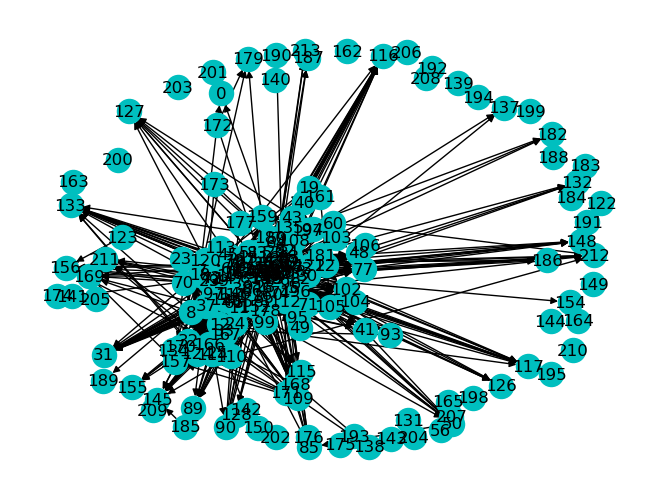

In [4]:
# Positioning and drawing of network (numbers)
pos = nx.spring_layout(FAO_Bananas_G, k=0.4)

nx.draw(FAO_Bananas_G, pos, node_color='c', node_size=300, edge_color='black', with_labels=True)

### Including a helper function for plotting the communities in our network

In [5]:
# Function for plotting communities in the network
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=100, edge_color='grey', with_labels=True, font_size=6, width=0.3)
    plt.show()
    return

### Graph partitioning using the Girvan-Newman algorithm

#### Customizing our visualization with country labels

In [6]:
# Reading in country names
Names = []
with open('fao_trade_names.txt', 'r') as fd:
    lines = fd.readlines()
    for line in lines:
        name = line.split('\n')[0]
        Names.append(name)

In [7]:
# Creating dictionary
names_dictionary = { i : Names[i] for i in range(0, len(Names) ) }

In [8]:
# Relabeling nodes with country names
FAO_Bananas_G = nx.relabel_nodes(FAO_Bananas_G, names_dictionary)

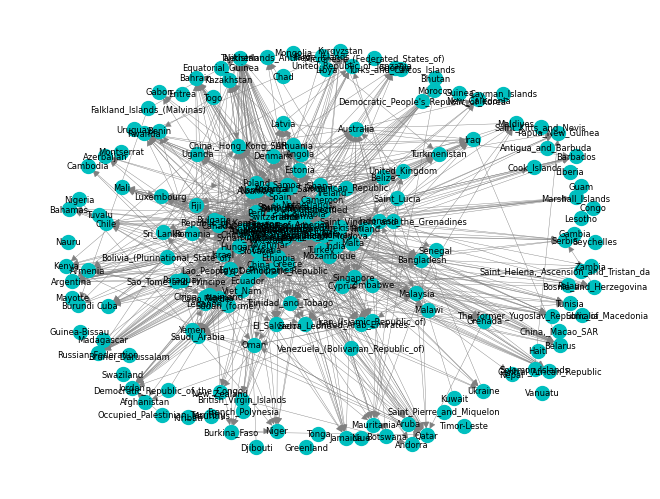

In [39]:
# Positioning and drawing of network (names)
pos_names = nx.spring_layout(FAO_Bananas_G, k=2)

nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=100, edge_color='grey', with_labels=True, font_size=6, width=0.3)

In [10]:
# Helper code for plotting communities with country names
comm = girvan_newman(FAO_Bananas_G)
gn_communities = tuple(sorted(c) for c in next(comm))

def switch_to_numbers(G, C):
    num_comm = len(C)
    a = []
    for c in range(num_comm):
        a.append([0])
    for i, node in enumerate(G.nodes()):
        for j in range(num_comm):
            if node in C[j]:
                a[j].append(i)
    for c in range(num_comm):
        a[c] = a[c][1:]
    return a

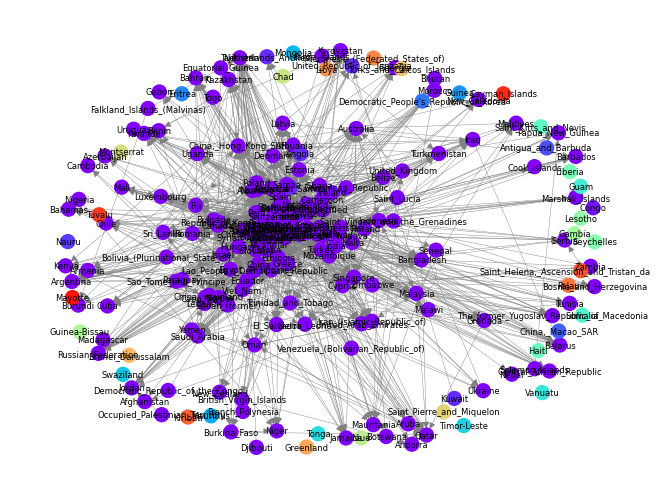

In [40]:
# Plotting network with communites and country names
named_communities = switch_to_numbers(FAO_Bananas_G, gn_communities)

Plot_Comm(FAO_Bananas_G, named_communities, pos_names)

### Basic network attributes

First, we want to verify whether or not the network is directed. To do this, we use the all_close function. Because it returns False, it means the matrix and its transpose are not the same and therefore the network is directed.

In [17]:
np.allclose(FAO_Bananas, FAO_Bananas.T)

False

#### Number of nodes in the network?

In [18]:
np.shape(FAO_Bananas)
N = np.shape(FAO_Bananas)[0]
print(N)

214


There are a total 214 nodes in the network, each representing a country in the trade network.

#### Number of edges in the network?

In [19]:
print(FAO_Bananas_G.number_of_edges())

1752


There are a total 1,752 edges in the network, representing import and export relationships of bananas among countries.

### Centrality in the banana network

In [20]:
deg_cen = nx.degree_centrality(FAO_Bananas_G)
close_cen = nx.closeness_centrality(FAO_Bananas_G)
eigen_cen = nx.eigenvector_centrality(FAO_Bananas_G)
betw_cen = nx.betweenness_centrality(FAO_Bananas_G)

print('The country with highest degree centrality is', max(deg_cen, key=lambda key: deg_cen[key]))
print('The country with highest closeness centrality is', max(close_cen, key=lambda key: close_cen[key]))
print('The country with highest eigenvector centrality is', max(eigen_cen, key=lambda key: eigen_cen[key]))
print('The country with highest betweenness centrality is', max(betw_cen, key=lambda key: betw_cen[key]))

The country with highest degree centrality is Germany
The country with highest closeness centrality is China
The country with highest eigenvector centrality is Germany
The country with highest betweenness centrality is Germany


#### Centrality Graph (closeness)

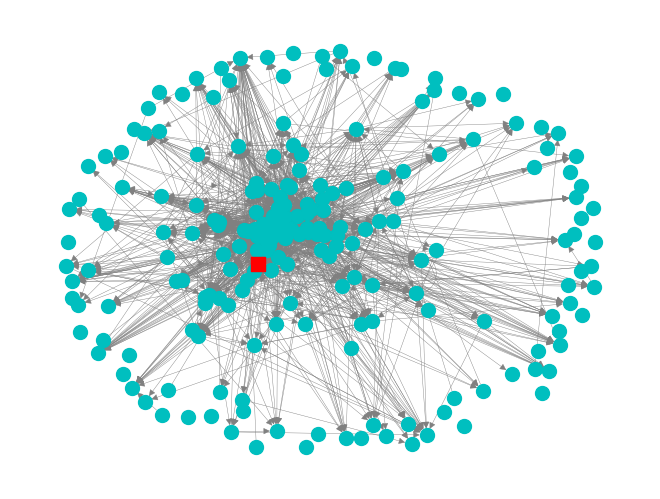

In [59]:
nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=100, edge_color='grey', with_labels=False, width=0.3)
nx.draw_networkx_nodes(FAO_Bananas_G, pos_names, node_color = 'red', nodelist = ['China'], label = 'China', node_size=100, node_shape='s')

#### Centrality Graph (degree, eigenvenctor, betweenness)

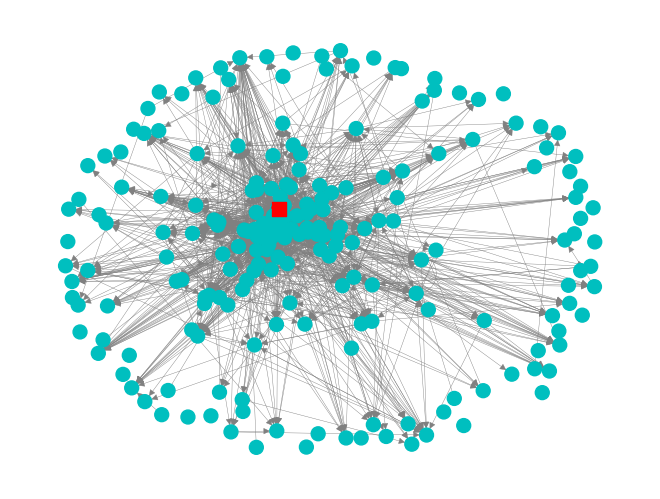

In [57]:
nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=100, edge_color='grey', with_labels=False, width=0.3)
nx.draw_networkx_nodes(FAO_Bananas_G, pos_names, node_color = 'red', nodelist = ['Germany'], label = 'Germany', node_size=100, node_shape='s')

### Clustering coefficient

In [46]:
clustering = nx.algorithms.clustering(FAO_Bananas_G)
print('The country with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

average_cc = nx.algorithms.average_clustering(FAO_Bananas_G)
print('The average clustering coefficient for the banana network is ', average_cc)

The country with lowest clustering coefficient is Afghanistan
The average clustering coefficient for the banana network is  0.19276834633257203


### Degree Distribution

#### In-Degree

<BarContainer object of 37 artists>

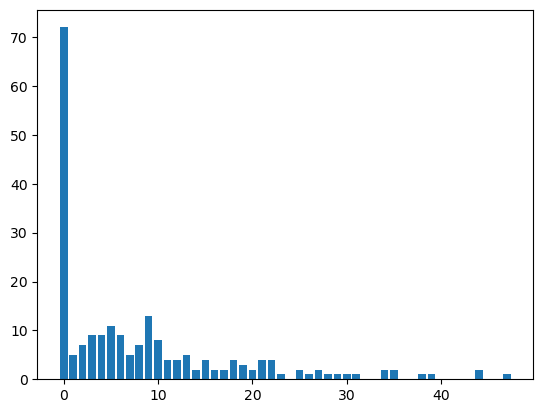

In [38]:
degree_sequence_in = sorted((d for n, d in FAO_Bananas_G.in_degree()), reverse=True)
plt.bar(*np.unique(degree_sequence_in, return_counts=True))

#### Out-Degree

<BarContainer object of 43 artists>

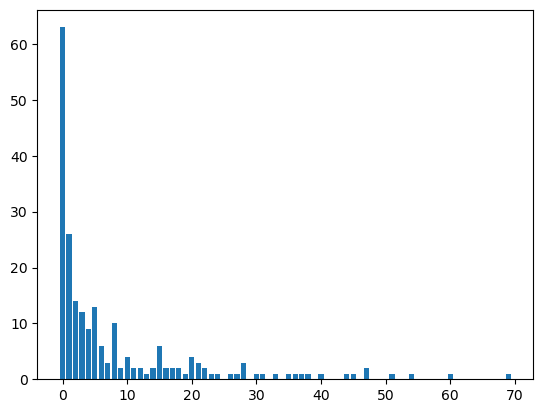

In [39]:
degree_sequence_out = sorted((d for n, d in FAO_Bananas_G.out_degree()), reverse=True)
plt.bar(*np.unique(degree_sequence_out, return_counts=True))

### Connectedness

Because we found our banana network to be directed above, we will determine strongly connected components.

In [48]:
print(nx.number_strongly_connected_components(FAO_Bananas_G))
print(nx.is_strongly_connected(FAO_Bananas_G))

104
False


These results tell us that the overall network is not strongly connected and has 104 separate strongly connected components.